In [15]:
import pandas as pd
from pdpbox import pdp, get_example, info_plots

In [16]:
import warnings
warnings.filterwarnings("ignore")

In [17]:
import matplotlib
print(matplotlib.__version__)

3.8.4


In [18]:
import sklearn
print(sklearn.__version__)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

1.4.2


In [19]:
df = pd.read_csv('./augmentation_features.csv')

print(df.shape)
df.head()



(3000, 29)


,file_name,type,n_semitones,rate,preset,hpss,y_id,y,preset_id,drc_attack,...,tf_x5,tf_y5,tf_x6,tf_y6,drc_knee,drc_ratio,drc_makeup_gain,bpm,asc,type_encoded
0,Media-105104_21_hpss,Waltz,1.0,0.5,music standard,1,7,Waltz,3,0.1,...,-21,-21,0,-20,0,0.0,0.1,89.102909,1415.393574,7
1,Media-105104_21,Waltz,1.0,0.5,music standard,0,7,Waltz,3,0.1,...,-21,-21,0,-20,0,0.0,0.1,86.132812,1602.002153,7
2,Media-104804_147_hpss,Waltz,2.0,2.0,music standard,1,6,VienneseWaltz,3,0.1,...,-21,-21,0,-20,0,0.0,0.1,172.265625,1932.268645,7
3,Media-104804_147,Waltz,2.0,2.0,music standard,0,6,VienneseWaltz,3,0.1,...,-21,-21,0,-20,0,0.0,0.1,172.265625,2074.990063,7
4,Media-104702_62_hpss,Waltz,-2.0,1.0,film light,1,7,Waltz,0,0.1,...,-21,-21,0,-20,0,0.0,0.1,172.265625,806.763745,7


In [20]:
type(pd.Series(df['y'].iloc[1:]))

pandas.core.series.Series

In [33]:
target=pd.Series(df['y_id'])

target_bpm = info_plots.TargetPlot(
    df=df,
    feature="bpm",
    feature_name="bpm",
    target='y_id',
    num_grid_points=10,
    grid_type='percentile',
    percentile_range=None,
    grid_range=None,
    cust_grid_points=None,
    show_outliers=False,
    endpoint=True,
)

In [53]:
fig, axes, summary_df = target_bpm.plot(
    which_classes=[1, 2],
    show_percentile=True,
    figsize=(1200, 400),
    ncols=2,
    plot_params={"gaps": {"outer_y": 0.05, "top": 0.1}},
    engine='plotly',
    template='plotly_white',
)
fig

In [54]:
target=pd.Series(df['y_id'])

target_asc = info_plots.TargetPlot(
    df=df,
    feature="asc",
    feature_name="asc",
    target='y_id',
    num_grid_points=10,
    grid_type='percentile',
    percentile_range=None,
    grid_range=None,
    cust_grid_points=None,
    show_outliers=False,
    endpoint=True,
)

In [55]:
fig, axes, summary_df = target_asc.plot(
    which_classes=[1, 2],
    show_percentile=True,
    figsize=(1200, 400),
    ncols=2,
    plot_params={"gaps": {"outer_y": 0.05, "top": 0.1}},
    engine='plotly',
    template='plotly_white',
)
fig

In [56]:
target=pd.Series(df['y_id'])

target_hpss = info_plots.TargetPlot(
    df=df,
    feature="hpss",
    feature_name="hpss",
    target='y_id',
    num_grid_points=10,
    grid_type='percentile',
    percentile_range=None,
    grid_range=None,
    cust_grid_points=None,
    show_outliers=False,
    endpoint=True,
)

In [57]:
fig, axes, summary_df = target_hpss.plot(
    which_classes=[1, 2],
    show_percentile=True,
    figsize=(1200, 400),
    ncols=2,
    plot_params={"gaps": {"outer_y": 0.05, "top": 0.1}},
    engine='plotly',
    template='plotly_white',
)
fig

In [58]:
target=pd.Series(df['y_id'])

target_drc = info_plots.TargetPlot(
    df=df,
    feature="drc_makeup_gain",
    feature_name="drc_makeup_gain",
    target='y_id',
    num_grid_points=10,
    grid_type='percentile',
    percentile_range=None,
    grid_range=None,
    cust_grid_points=None,
    show_outliers=False,
    endpoint=True,
)

In [59]:
fig, axes, summary_df = target_drc.plot(
    which_classes=[1, 2],
    show_percentile=True,
    figsize=(1200, 400),
    ncols=2,
    plot_params={"gaps": {"outer_y": 0.05, "top": 0.1}},
    engine='plotly',
    template='plotly_white',
)
fig

In [36]:
summary_df

,x,value,percentile,count,y_id
0,0,"[42.36, 86.13)","[0.0, 11.11)",245,6.579592
1,1,"[86.13, 89.1)","[11.11, 22.22)",347,6.487032
2,2,"[89.1, 92.29)","[22.22, 33.33)",265,6.550943
3,3,"[92.29, 117.45)","[33.33, 44.44)",299,6.505017
4,4,"[117.45, 123.05)","[44.44, 66.67)",218,5.894495
5,5,"[123.05, 136.0)","[55.56, 77.78)",926,6.212743
6,6,"[136.0, 172.27)","[77.78, 88.89)",148,6.628378
7,7,"[172.27, 258.4]","[88.89, 100.0]",552,6.161232


In [50]:
predict_67 = info_plots.InteractTargetPlot(
    df=df,
    target='y_id',
    features=["bpm", "asc", "hpss", "drc_makeup_gain"],
    feature_names=["bpm", "asc", "hpss", "drc_makeup_gain"],
    num_grid_points=10,
    cust_grid_points=None,
    show_outliers=False,
)

In [52]:
fig, axes, summary_df = predict_67.plot(
    which_classes=[0, 1, 2, 3],
    show_percentile=False,
    figsize=None,
    ncols=2,
    annotate=False,
    plot_params={"gaps": {"inner_y": 0.06}},
    engine='plotly',
    template='plotly_white',
)
fig

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

In [26]:
X, y = load_diabetes(return_X_y=True)

X.shape



(442, 10)

In [27]:
X = df[['bpm', 'asc', 'hpss', 'drc_makeup_gain']].to_numpy()
y = df['y_id']

rf = RandomForestRegressor().fit(X, y)
X

array([[8.91029095e+01, 1.41539357e+03, 1.00000000e+00, 1.00000000e-01],
       [8.61328125e+01, 1.60200215e+03, 0.00000000e+00, 1.00000000e-01],
       [1.72265625e+02, 1.93226864e+03, 1.00000000e+00, 1.00000000e-01],
       ...,
       [8.91029095e+01, 1.75012462e+03, 0.00000000e+00, 1.00000000e-01],
       [1.72265625e+02, 1.12231744e+03, 1.00000000e+00, 1.00000000e-01],
       [1.84570312e+02, 1.24185704e+03, 0.00000000e+00, 1.00000000e-01]])

In [28]:
features = [0, 1, 2, 3]

features_averages = {}
for feature in tqdm(features):
    features_averages[feature] = ([], [])
    
  # For each unique value in the feature
    for feature_val in np.unique(X[:, feature]):
        features_averages[feature][0].append(feature_val)
    
    # We remove the feature from the dataset
        aux_X = np.delete(X, feature, axis=1)
    # We add the feature value for every row of the dataset
        aux_X = np.hstack((aux_X, np.array([feature_val for i in range(aux_X.shape[0])])[:, None]))
        
    # We calculate the average prediction
        features_averages[feature][1].append(np.mean(rf.predict(aux_X)))

100%|██████████| 4/4 [00:31<00:00,  7.82s/it]


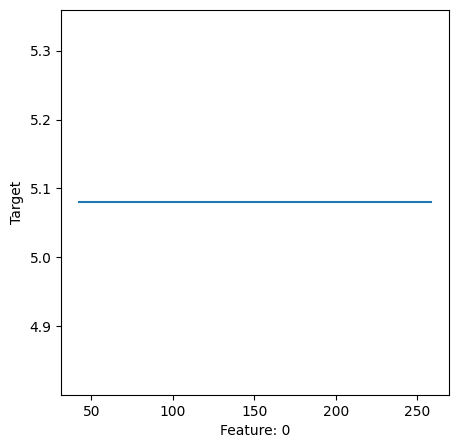

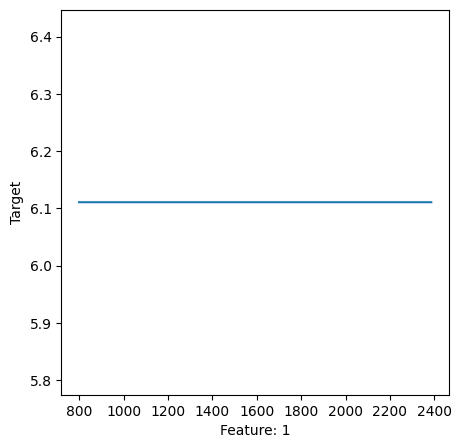

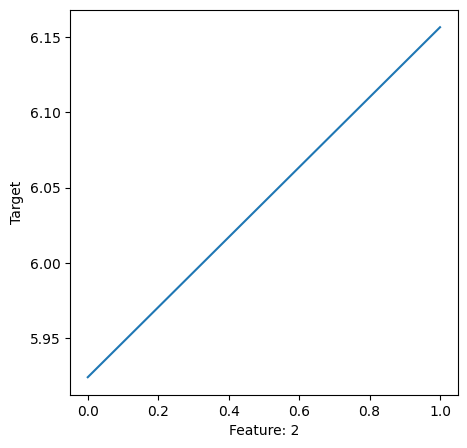

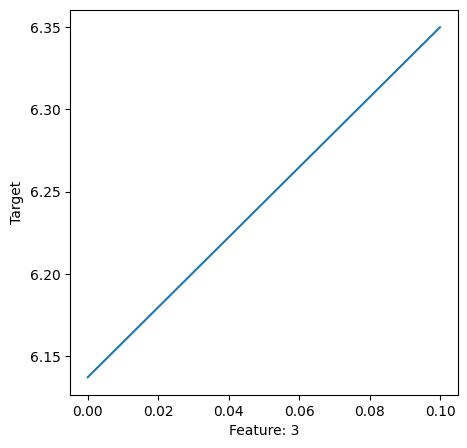

In [29]:
for feature in features_averages:
    plt.figure(figsize=(5,5))
    values = features_averages[feature][0]
    predictions = features_averages[feature][1]
    
    plt.plot(values, predictions)
    plt.xlabel(f'Feature: {feature}')
    plt.ylabel('Target')